## **Business Case: Predict whether a patient is having heart disease 

\

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Importing the dataset**

In [2]:
data_x = pd.read_csv('values.csv')
data_y = pd.read_csv('labels.csv')

In [3]:
data_y

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
data = pd.concat([data_x,data_y['heart_disease_present']],axis = 1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


### **Domain Analysis**


1.   **patient_id** : the column is a unique and random identifier.
2.   slope_of_peak_exercise_st_segment [**slope**] (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3.  **thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4.  resting_blood_pressure [**bp**] (type: int): resting blood pressure
5.  chest_pain_type [**cp**] (type: int): chest pain type (4 values)
6.  num_major_vessels [**major_vessels**] (type: int): number of major vessels (0-3) colored by flourosopy
7.  fasting_blood_sugar_gt_120_mg_per_dl [**fbs**] (type: binary): fasting blood sugar > 120 mg/dl
8.  resting_ekg_results [**rest_ecg**] (type: int): resting electrocardiographic results (values 0,1,2)
9.  serum_cholesterol_mg_per_dl [**cholesterol**] (type: int): serum cholestoral in mg/dl
10.  oldpeak_eq_st_depression [**oldpeak**] (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11.  sex (type: binary): 0: female, 1: male
12.  age (type: int): age in years
13.  max_heart_rate_achieved [**heart rate**] (type: int): maximum heart rate achieved (beats per minute)
14.  exercise_induced_angina [**agina**] (type: binary): exercise-induced chest pain (0: False, 1: True)

### **Basic checks**

In [5]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [7]:
data.drop('patient_id', axis=1,inplace=True)

In [8]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [9]:
data.rename(columns = {'slope_of_peak_exercise_st_segment' : 'slope',
                       'resting_blood_pressure' : 'bp',
                       'chest_pain_type' : 'cp',
                       'num_major_vessels' : 'major_vessels',
                       'fasting_blood_sugar_gt_120_mg_per_dl' : 'fbs',
                       'resting_ekg_results' : 'rest_ecg',
                       'serum_cholesterol_mg_per_dl' : 'cholesterol',
                       'oldpeak_eq_st_depression' : 'oldpeak',
                       'max_heart_rate_achieved' : 'heart_rate',
                       'exercise_induced_angina' : 'angina',
                       'heart_disease_present' : 'target'}, inplace = True)
data.head()

,slope,thal,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [10]:
data.shape

(180, 14)

In [11]:
data.dtypes

slope              int64
thal              object
bp                 int64
cp                 int64
major_vessels      int64
fbs                int64
rest_ecg           int64
cholesterol        int64
oldpeak          float64
sex                int64
age                int64
heart_rate         int64
angina             int64
target             int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   slope          180 non-null    int64  
 1   thal           180 non-null    object 
 2   bp             180 non-null    int64  
 3   cp             180 non-null    int64  
 4   major_vessels  180 non-null    int64  
 5   fbs            180 non-null    int64  
 6   rest_ecg       180 non-null    int64  
 7   cholesterol    180 non-null    int64  
 8   oldpeak        180 non-null    float64
 9   sex            180 non-null    int64  
 10  age            180 non-null    int64  
 11  heart_rate     180 non-null    int64  
 12  angina         180 non-null    int64  
 13  target         180 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 19.8+ KB


In [13]:
data.isnull().sum()

slope            0
thal             0
bp               0
cp               0
major_vessels    0
fbs              0
rest_ecg         0
cholesterol      0
oldpeak          0
sex              0
age              0
heart_rate       0
angina           0
target           0
dtype: int64

 **Insight:There are no missing values**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
bp,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
cp,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fbs,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
rest_ecg,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
cholesterol,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


**Insights:**

*   **The mean age of patients in the dataset is around 55 years, with the minimum age being 29 years and the maximum age being 77 years.**
*   **The mean resting blood pressure is 131 mm Hg, with the minimum being 94 mm Hg and the maximum being 180 mm Hg.**
*   **The mean serum cholesterol level is 249 mg/dL, with the minimum being 126 mg/dL and the maximum being 564 mg/dL.**
*   **The mean ST depression induced by exercise relative to rest is 1.01 mm, with the minimum being 0.0 mm and the maximum being 6.2 mm.**
*   **The mean number of major vessels (0-3) colored by flourosopy is 0.7, with the minimum being 0 and the maximum being 3.**

In [15]:
data['target'].unique()

array([0, 1])

* **_Clearly, this is a classification problem, with the target variable having values '0' and '1'._**
* **0 - no heart disease present**
* **1 - heart disease present**

In [16]:
data['target'].value_counts()

0    100
1     80
Name: target, dtype: int64

* **_Clearly this data is slightly imbalanced._**
* **_There are more observations related to heart disease absent and less observations related to heart disease present._**

In [17]:
# checking the correlation between columns
data.corr()['target'].abs().sort_values(ascending=False)

target           1.000000
angina           0.448647
major_vessels    0.421519
cp               0.412829
oldpeak          0.382930
heart_rate       0.375352
slope            0.344224
sex              0.335421
rest_ecg         0.145933
age              0.138255
cholesterol      0.079775
bp               0.078506
fbs              0.003379
Name: target, dtype: float64

**Insights:**
* **As you can see, the 'angina' variable (exercise_induced_angina) has the highest correlation with the target variable**
* **This shows that most columns are moderately correlated with target, but 'blood_sugar' is very weakly correlated.**

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**


In [18]:
data1=data.drop(["thal","target"],axis=1)

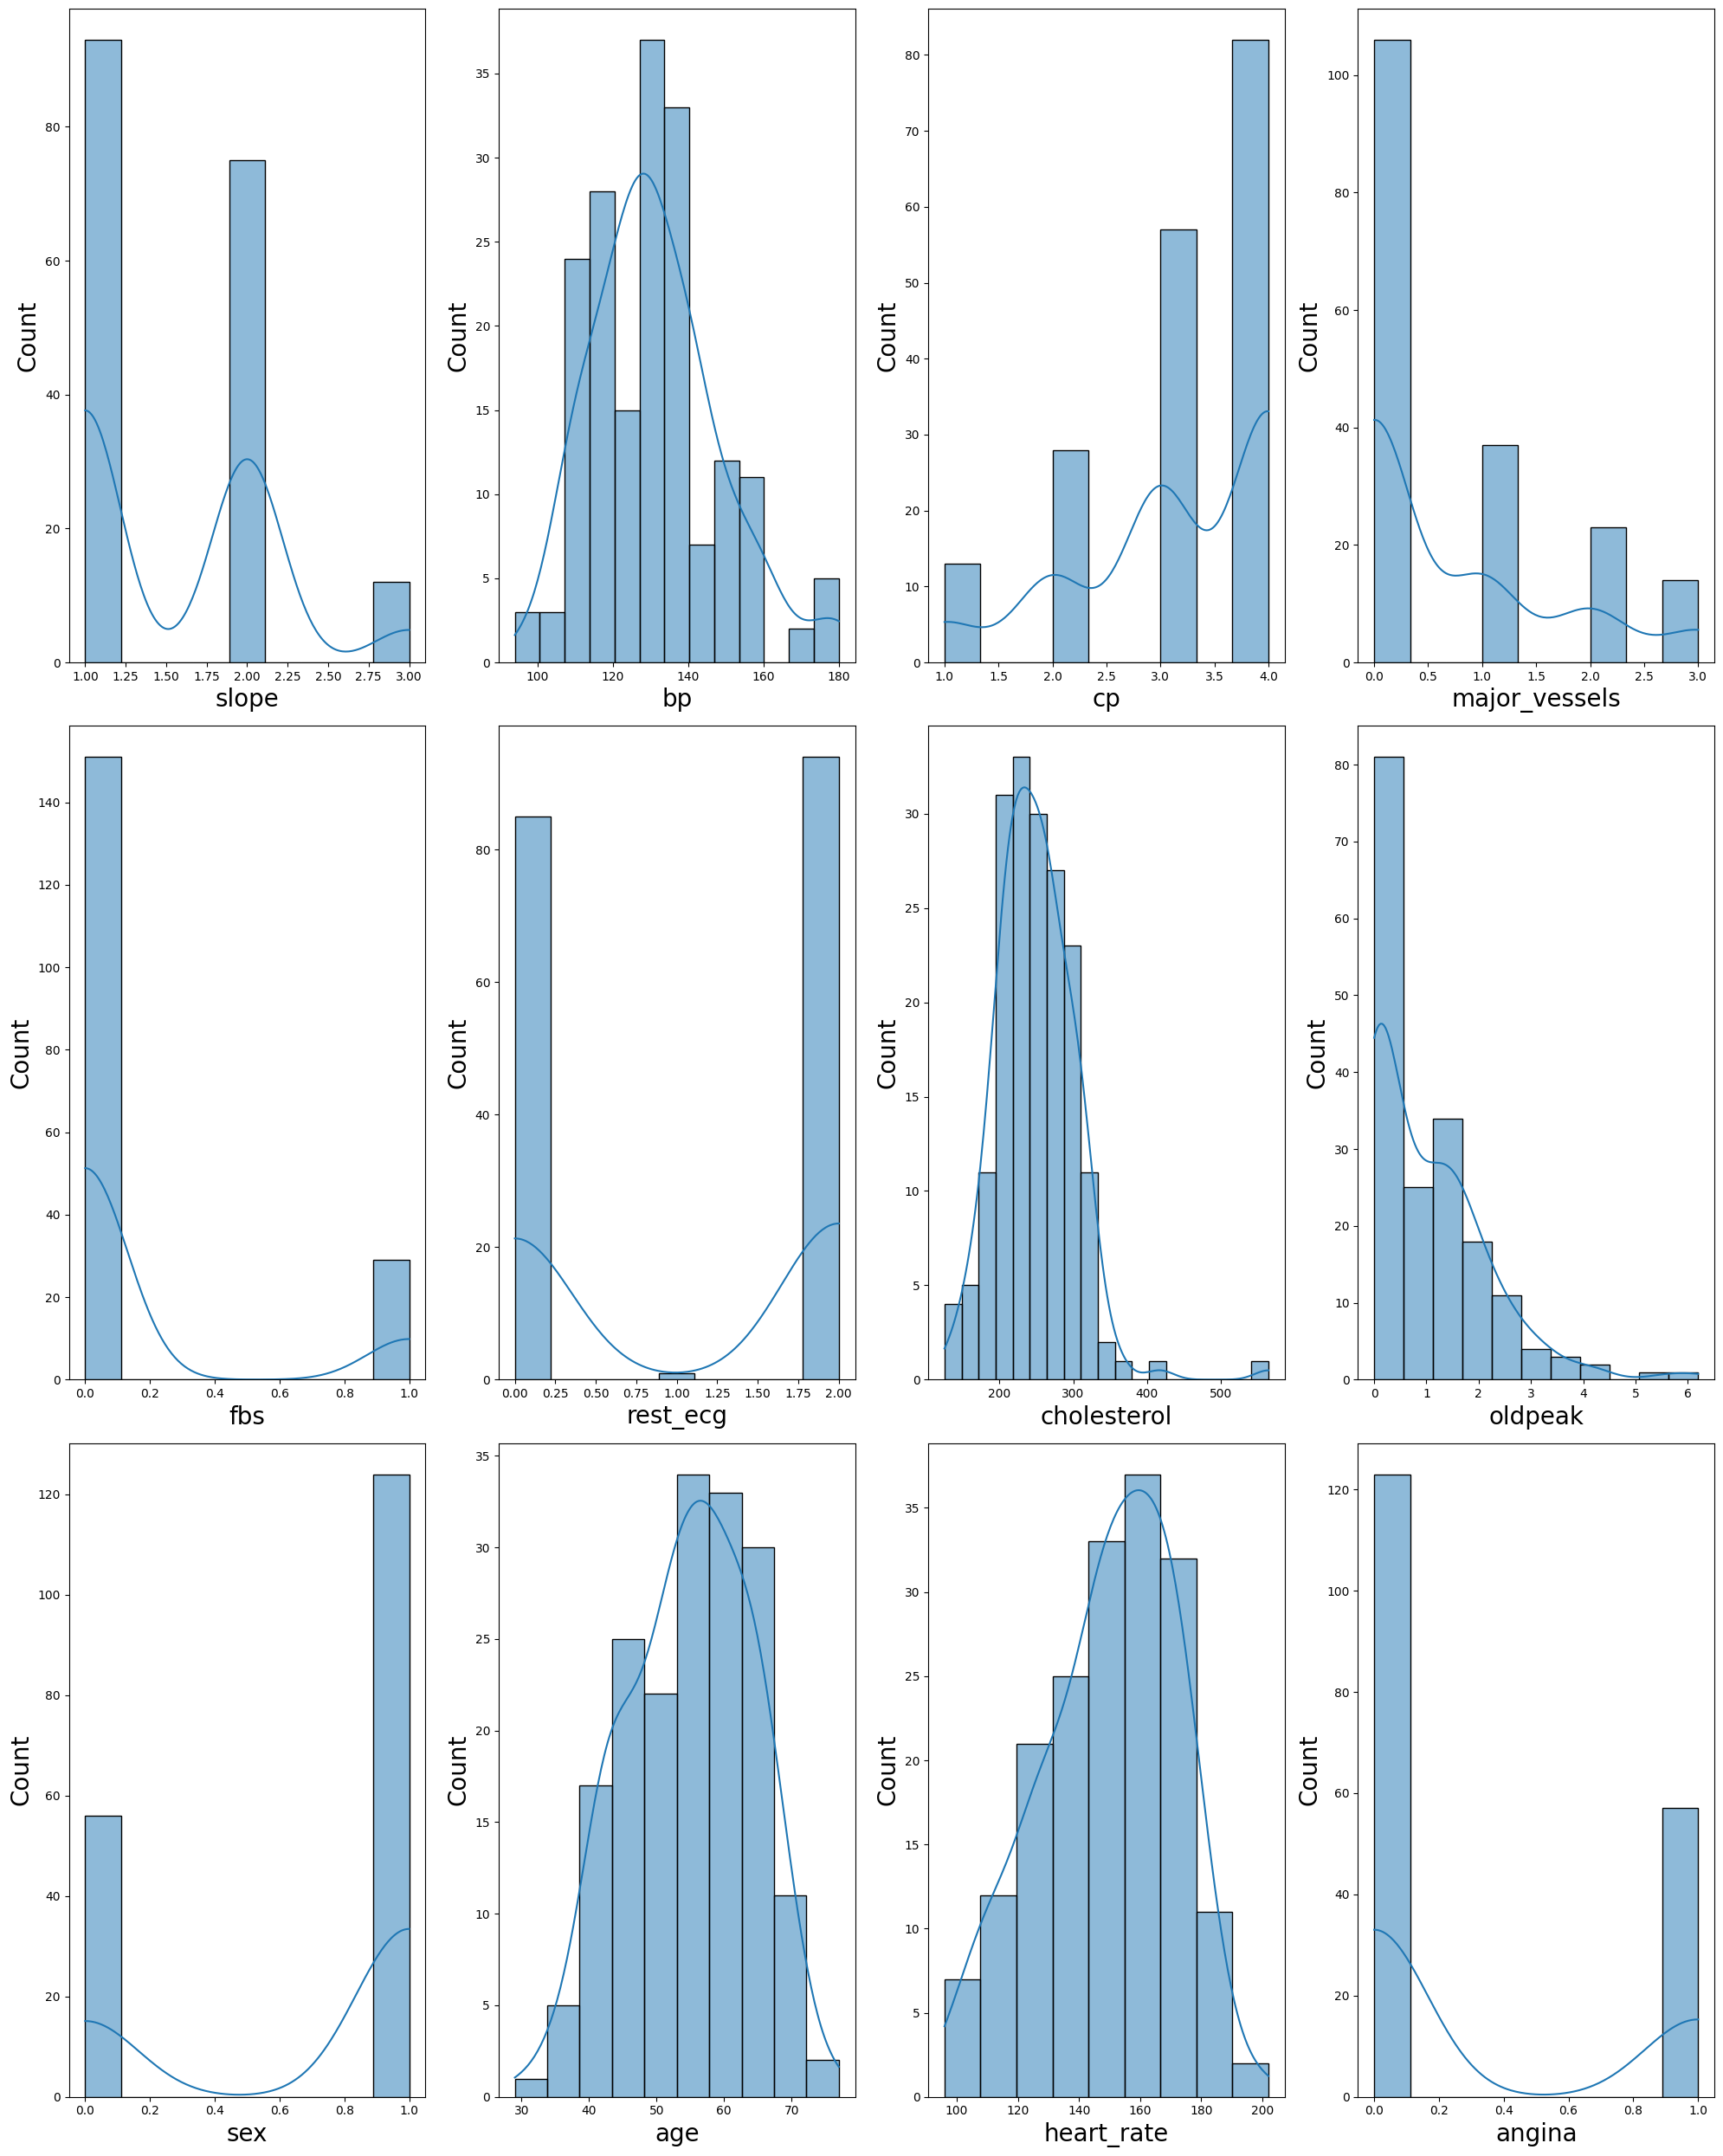

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(x=data1[column],data=data1,kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Insights:**

## **Analysing the target variable:**


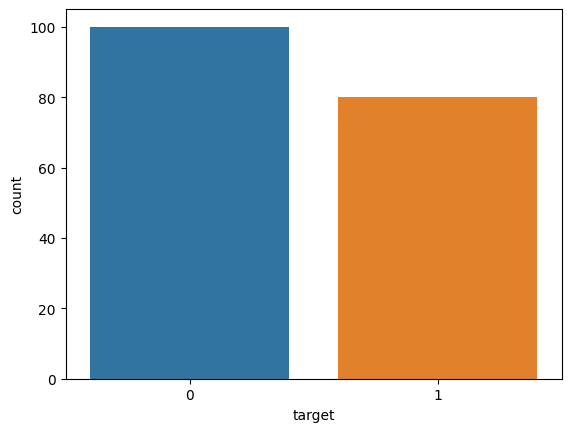

0    100
1     80
Name: target, dtype: int64


In [20]:
y=data["target"]
sns.countplot(data=data,x=y)
plt.show()
temp=data['target'].value_counts()
print(temp)

In [21]:
print("Percentage of patience without heart problems: "+str(round(temp[0]*100/180,2)))
print("Percentage of patience with heart problems: "+str(round(temp[1]*100/180,2)))

Percentage of patience without heart problems: 55.56
Percentage of patience with heart problems: 44.44


## **Analysing thal feature**


In [22]:
data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

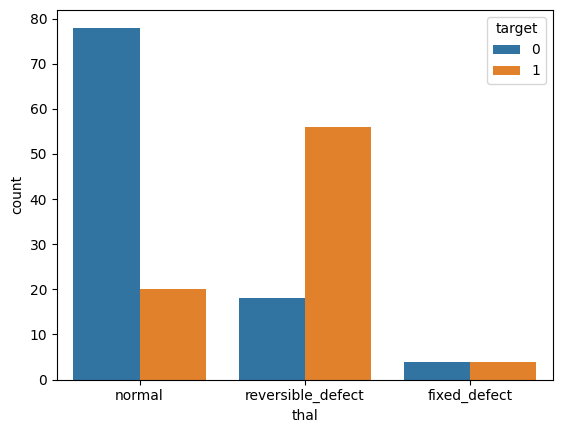

In [23]:
sns.countplot(data=data,x="thal",hue="target")

### **Insight**:
   * **Patients with 'normal' thal values have the highest chance of having no heart disease.**
   * **Patients with 'reversible_defect' thal values have the highest chance of having heart disease.**
   * **Patients with 'fixed_defect' thal values have the equal chance of having heart disease or not having heart disease.**

## **Analysing cp Feature**



In [24]:
data.cp.value_counts()

4    82
3    57
2    28
1    13
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

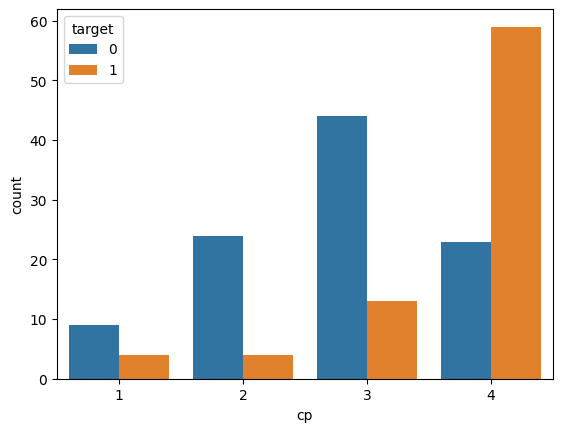

In [25]:
sns.countplot(data=data,x="cp",hue="target")

### **Insights**:
   * **People with chest pain type 4 have the highest chance of having heart disease.**
   * **People with chest pain type 1 & 2 have the lowest chance of having heart disease.**
   * **People with chest pain type 3 have the highest chance of having no heart disease.**
   * **People with chest pain type 1 have the lowest chance of having no heart disease.**
    

In [26]:
df=data.drop(['bp','cholesterol','oldpeak','age','heart_rate','target'],axis=1)
df.head()

,slope,thal,cp,major_vessels,fbs,rest_ecg,sex,angina
0,1,normal,2,0,0,2,1,0
1,2,normal,3,0,0,0,0,0
2,1,normal,4,3,0,2,1,1
3,1,reversible_defect,4,0,0,0,1,0
4,3,reversible_defect,1,0,0,2,1,0


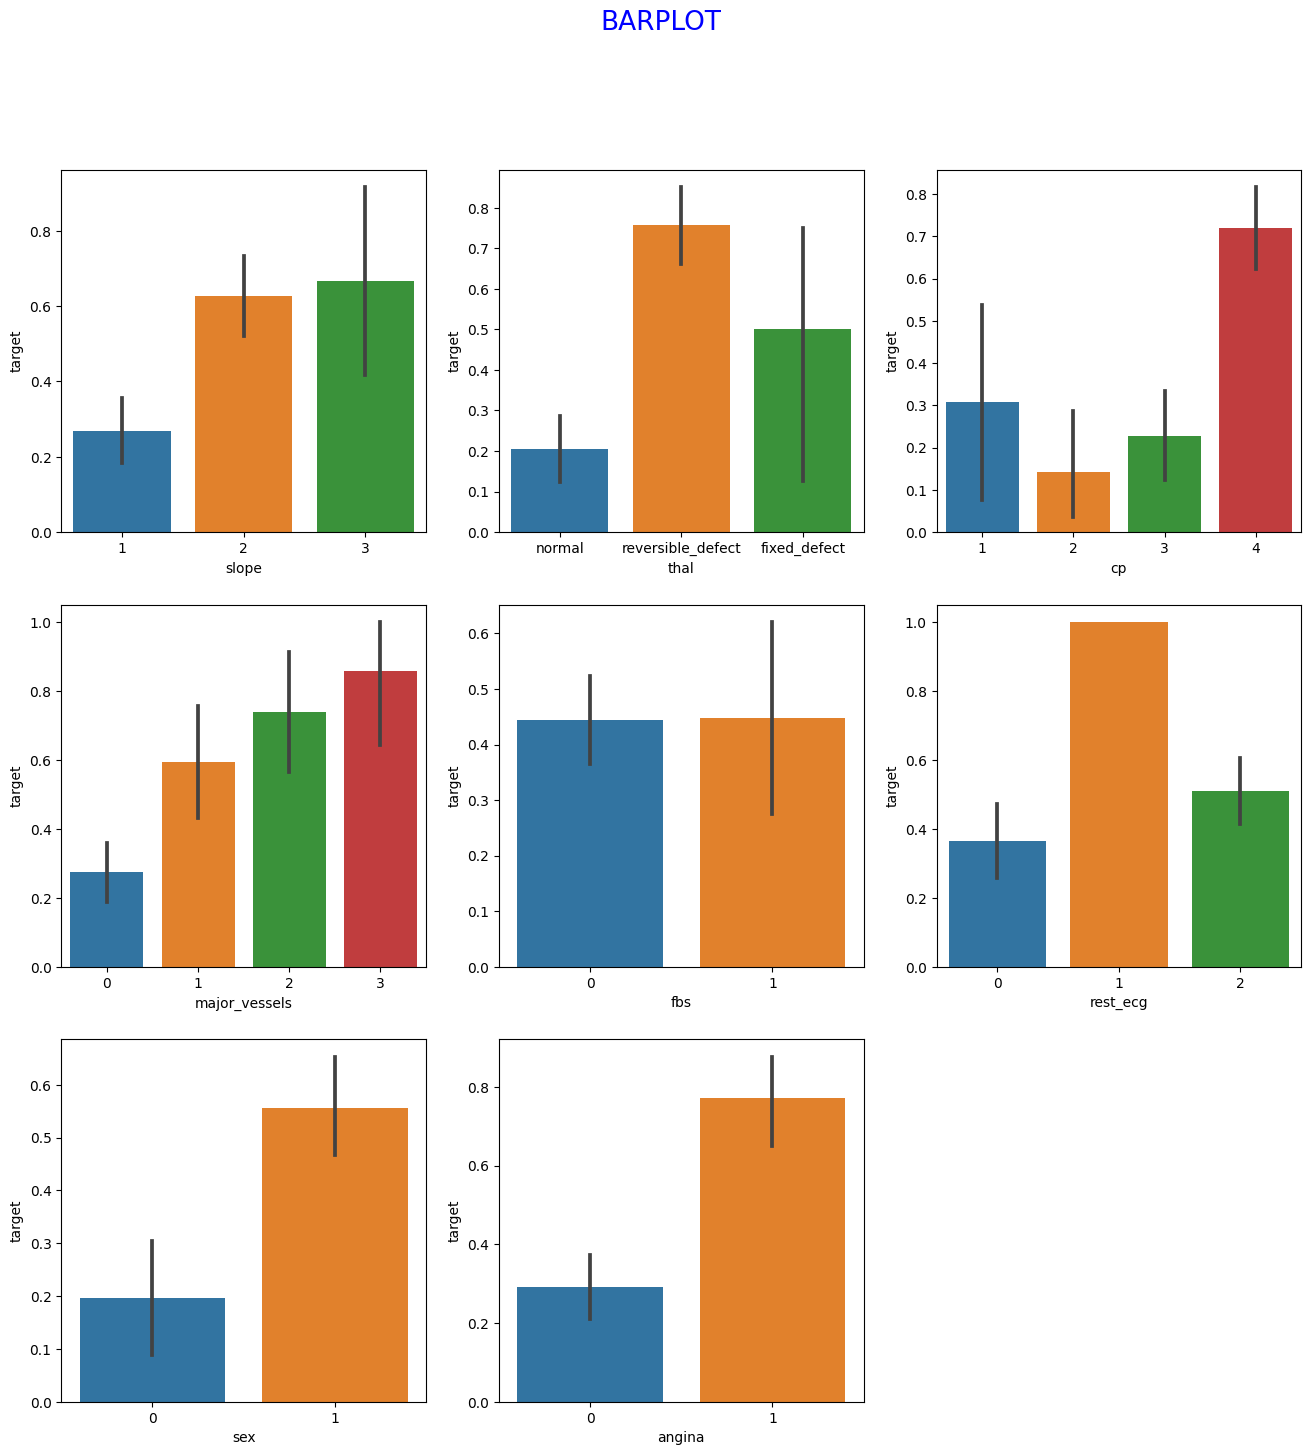

In [27]:
plt.figure(figsize=(16,16))
plotnumber=1
for i in df:
    if plotnumber<=9:
        plt.suptitle("BARPLOT",fontsize=19,color="blue")
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=df[i],y="target",data=data)
        plt.xlabel(i)
    plotnumber+=1

**Insights**:

   * **slope	:People with Slope '3' causes heart disease much more than Slope '1' and '2'**
   
    
   * **thal	:Patients with 'reversible_defect' thal values have the highest chance of having heart disease.*** 
   
    
   * **cp	:People with chest pain type 4 have heart diseases the most.**
   
    
   * **major_vessels	:People with 3 major vessels are more prone to heart diseases.**
   
   
   * **fbs	:Fasting blood sugar doesn't have much effect on heart disease.**
   
   
   * **rest_ecg	:People with resting electrocardiographic value 1 are more likely to have heart disease.**
   
   
   * **sex	:Males have more than 2 times chance to get heart disease when compared to females.**
   
   
   * **angina:Patients having excercise induced chest pain are more prone to heart diseases.**
  

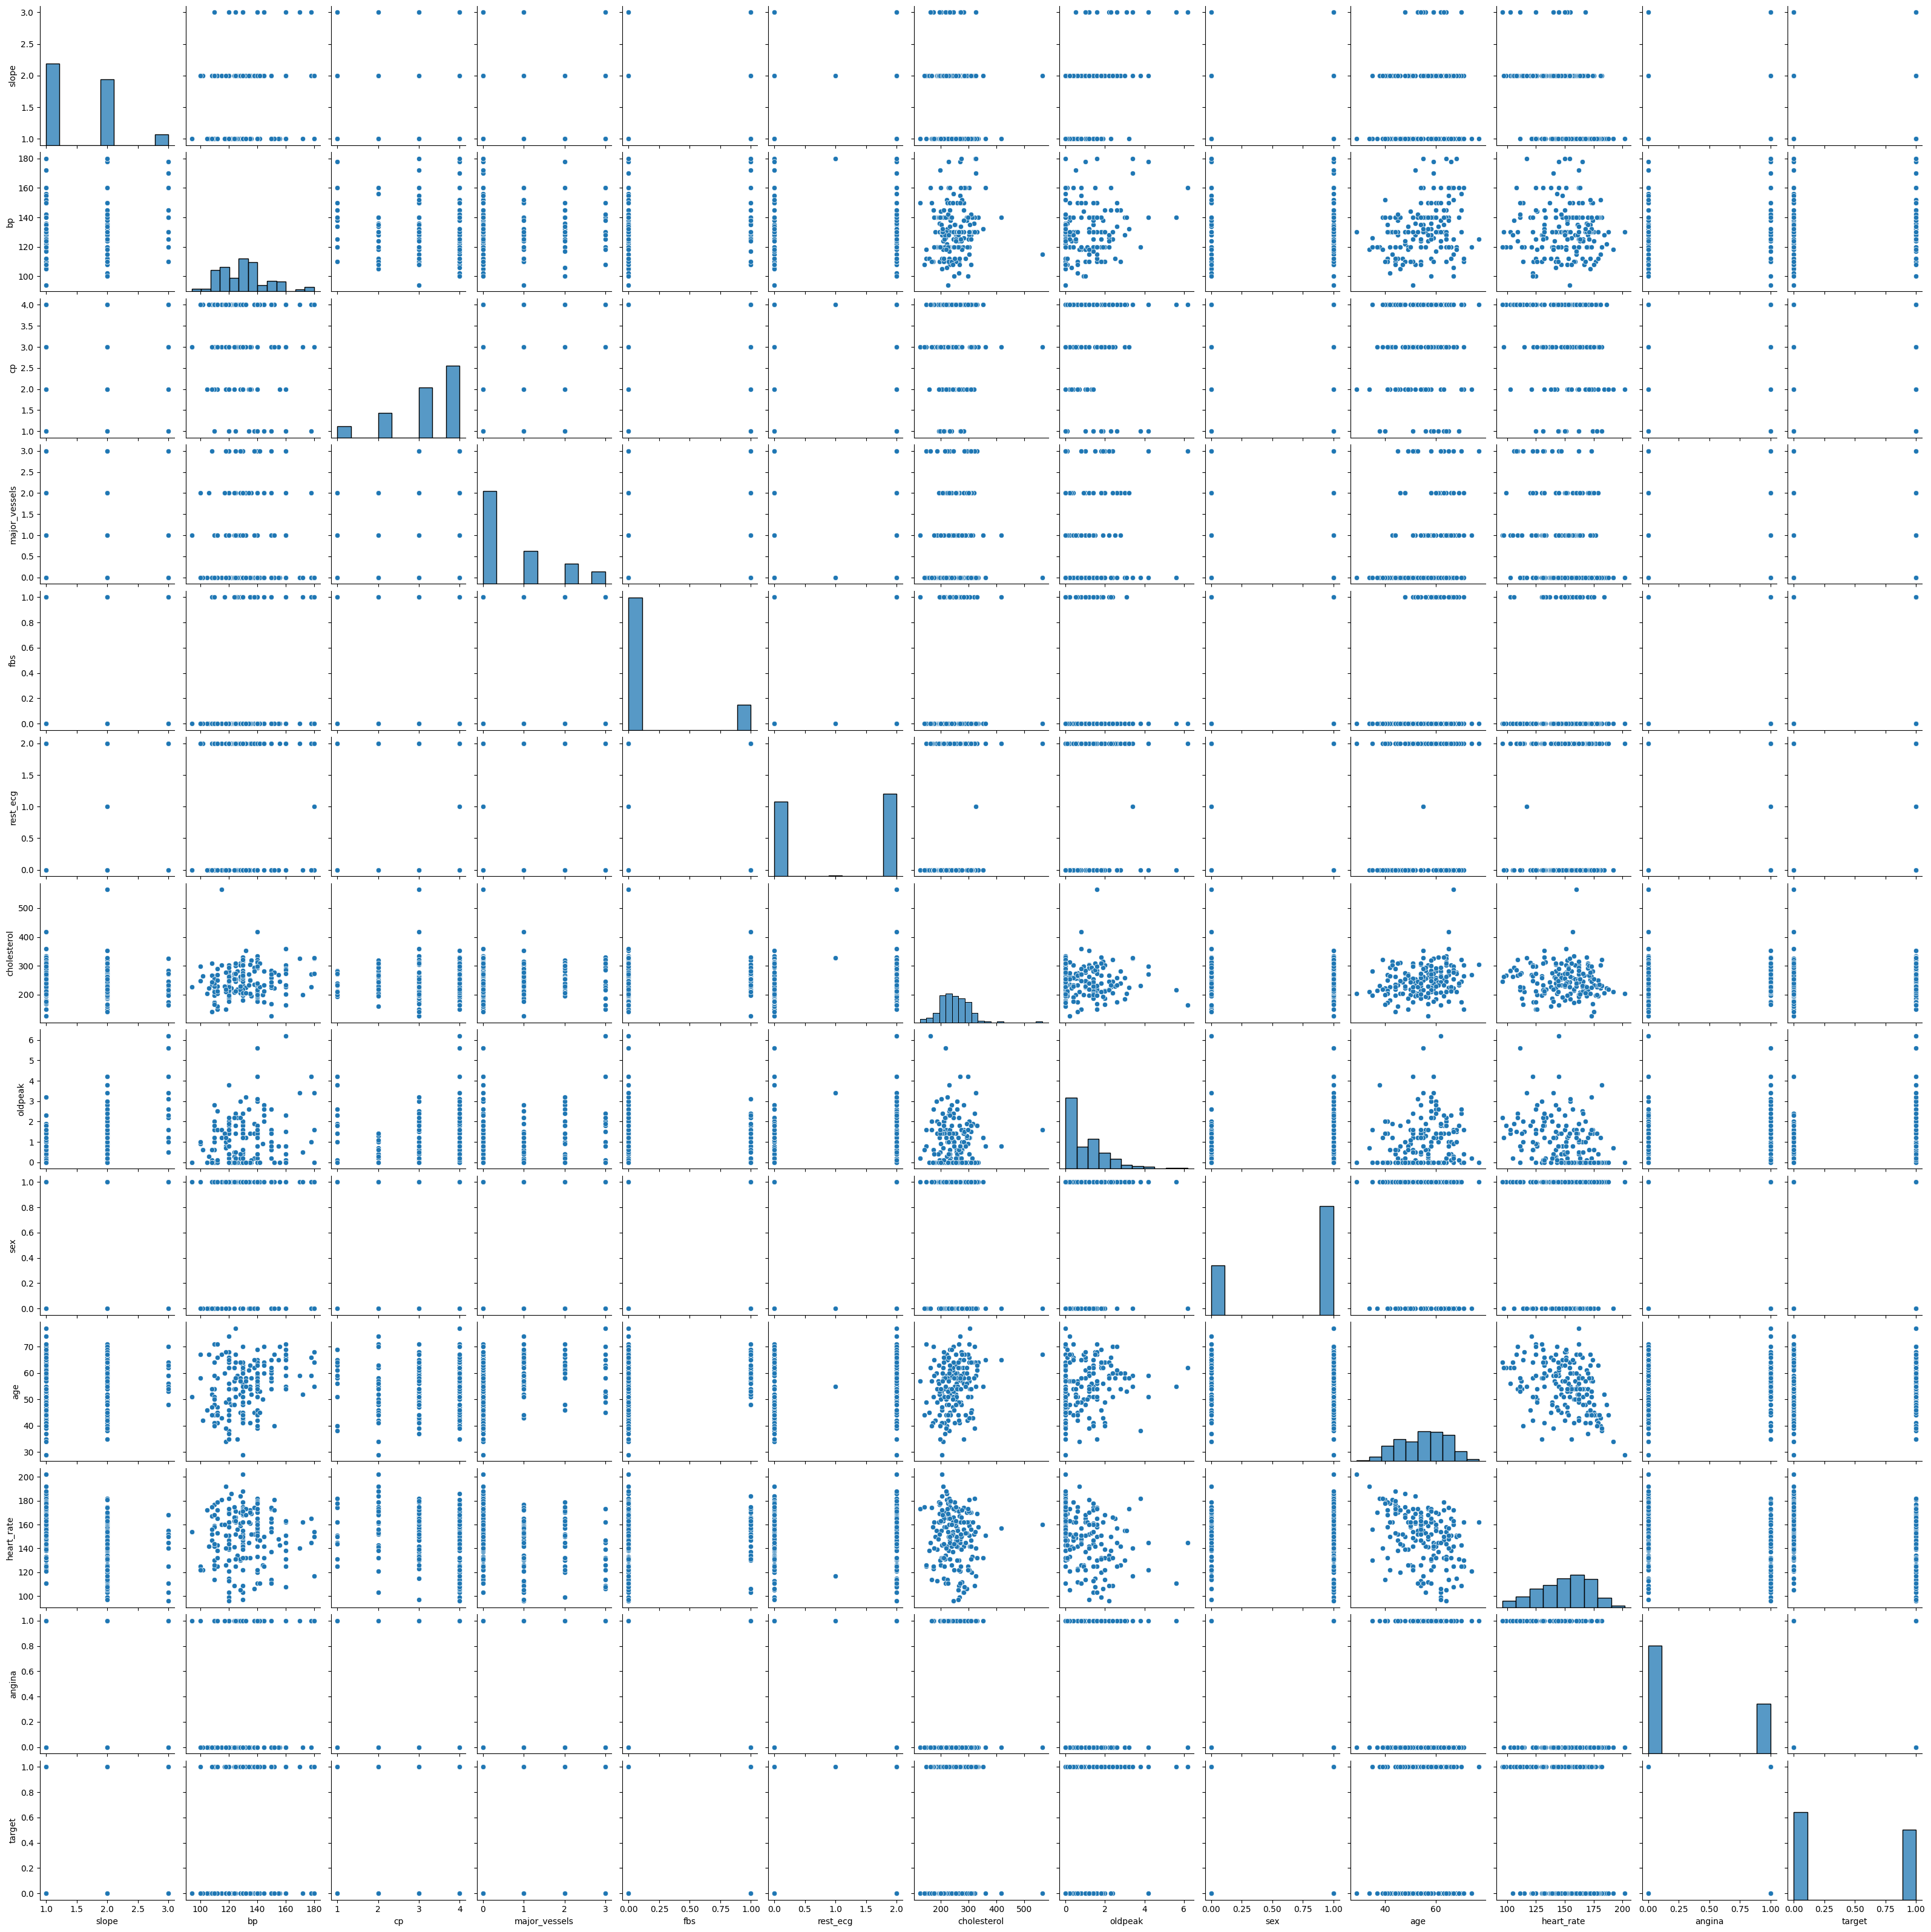

In [28]:
sns.pairplot(data)

# **Data Preprocessing**


### **check for duplicates**


In [29]:
data.duplicated().sum()

0

### **Handling the Categorical Feature**


In [30]:
data=pd.get_dummies(data,columns=["thal"],drop_first=True)
data.head()

,slope,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


### **Scaling**


In [31]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data1=pd.DataFrame(sc.fit_transform(data[["bp","cholesterol","oldpeak","age","heart_rate"]]),columns=
                   ["bp","cholesterol","oldpeak","age","heart_rate"])
data2=data.drop(["bp","cholesterol","oldpeak","age","heart_rate"],axis=1)
scaled_data=pd.concat([data1,data2],axis=1)

In [32]:
scaled_data.head()

,bp,cholesterol,oldpeak,age,heart_rate,slope,cp,major_vessels,fbs,rest_ecg,sex,angina,target,thal_normal,thal_reversible_defect
0,-0.195195,1.118269,-0.903207,-1.053964,0.932485,1,2,0,0,2,1,0,0,1,0
1,-1.256320,-0.669778,0.527616,-0.087134,0.387084,2,3,0,0,0,0,0,0,1,0
2,-0.372049,1.042182,-0.903207,2.383654,0.568884,1,4,3,0,2,1,1,1,1,0
3,1.219639,-0.498582,-0.903207,-1.591092,1.432436,1,4,0,0,0,1,0,1,0,1
4,2.752375,0.395442,2.852703,0.449994,-0.203768,3,1,0,0,2,1,0,0,0,1


In [33]:
df2=scaled_data.drop(["rest_ecg","sex","angina","target","thal_normal","thal_reversible_defect"],axis=1)

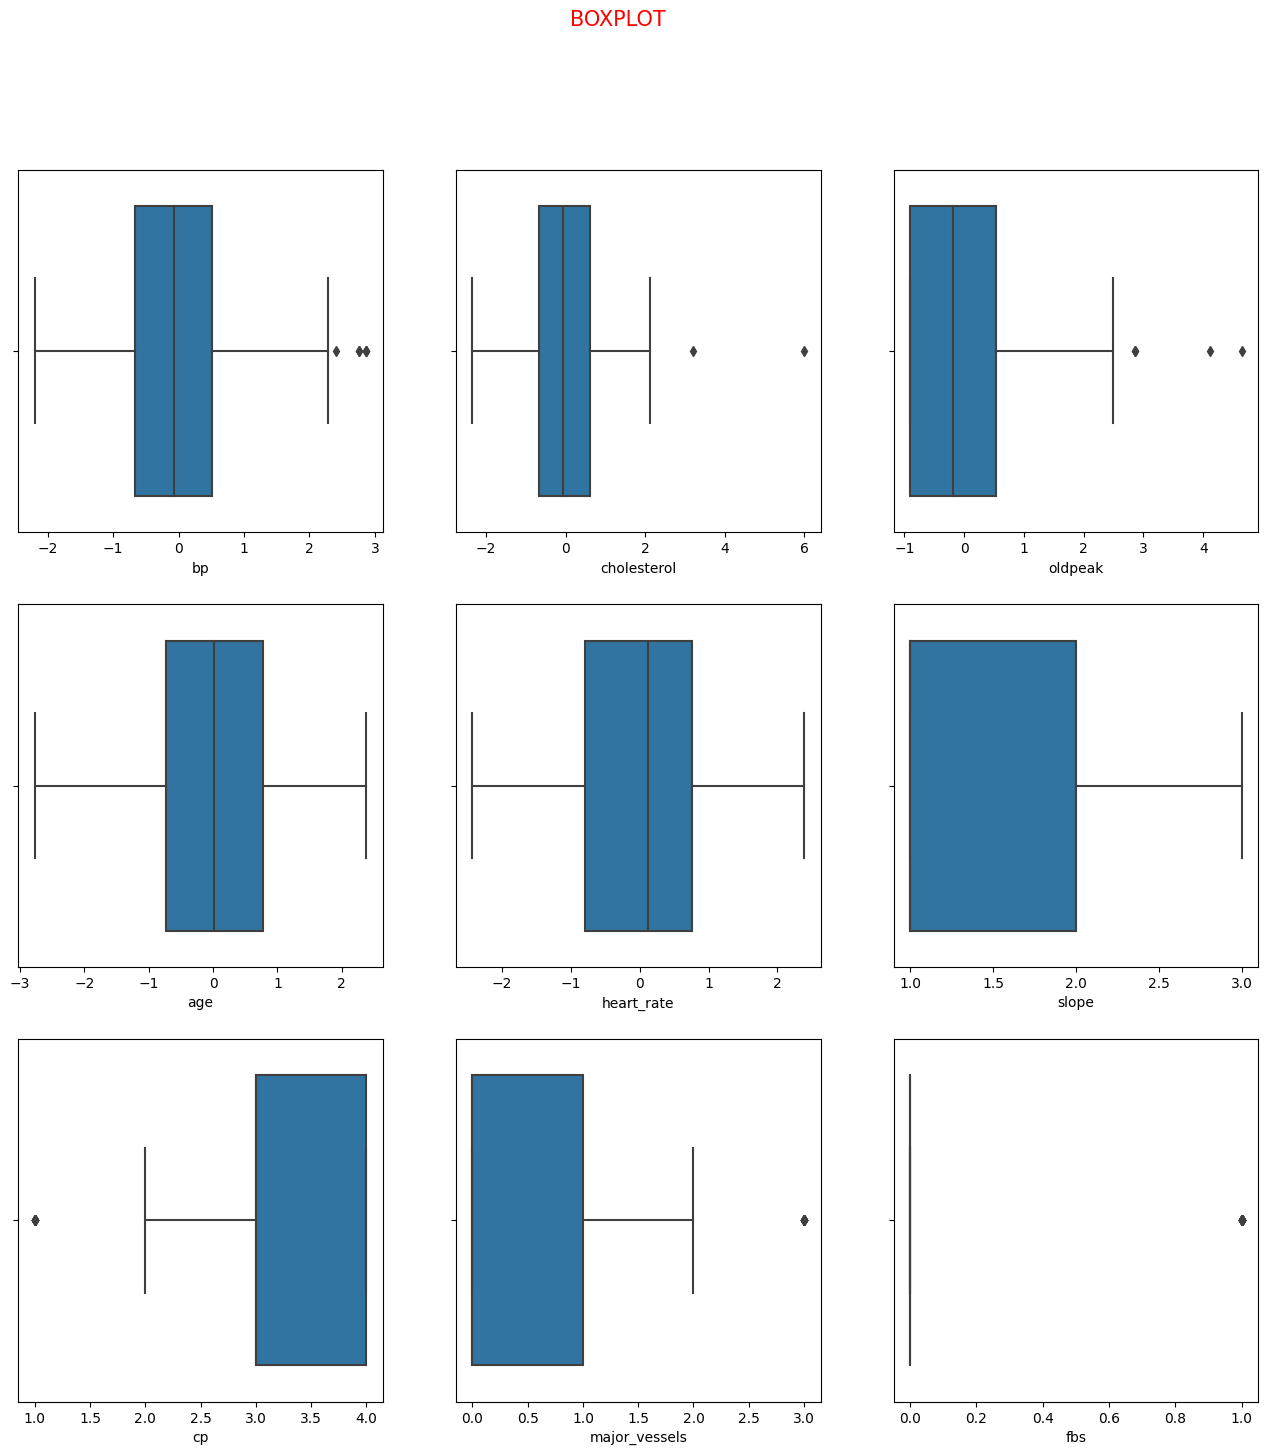

In [98]:
plt.figure(figsize=(16,16))
plotnumber=1
for i in df2:
    if plotnumber<=9:
        plt.suptitle("BOXPLOT",fontsize=15,color="red")
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df2[i])
        plt.xlabel(i)
    plotnumber+=1

# **Feature engineering**


In [99]:
scaled_data.corr()

,bp,cholesterol,oldpeak,age,heart_rate,slope,cp,major_vessels,fbs,rest_ecg,sex,angina,target,thal_normal,thal_reversible_defect
bp,1.000000,0.144881,0.219026,0.284402,-0.017521,0.098287,-0.029296,0.042388,0.166570,0.078986,-0.055589,0.123397,0.078506,-0.098964,0.046578
cholesterol,0.144881,1.000000,-0.021932,0.236211,-0.071038,-0.032348,0.061213,0.098348,0.027560,0.170839,-0.152296,0.083139,0.079775,0.021710,0.015760
oldpeak,0.219026,-0.021932,1.000000,0.189700,-0.341045,0.615948,0.080799,0.214062,-0.039055,0.097321,0.099374,0.249167,0.382930,-0.332991,0.313616
age,0.284402,0.236211,0.189700,1.000000,-0.394630,0.169918,0.085001,0.347355,0.176101,0.126856,-0.148997,0.081811,0.138255,-0.049719,0.020593
heart_rate,-0.017521,-0.071038,-0.341045,-0.394630,1.000000,-0.418102,-0.301792,-0.275687,0.058369,-0.102766,-0.053960,-0.365065,-0.375352,0.271064,-0.219006
slope,0.098287,-0.032348,0.615948,0.169918,-0.418102,1.000000,0.121207,0.076832,0.050199,0.172191,0.093340,0.225459,0.344224,-0.305492,0.243341
cp,-0.029296,0.061213,0.080799,0.085001,-0.301792,0.121207,1.000000,0.249061,-0.088992,0.033379,0.086057,0.346266,0.412829,-0.300914,0.307524
major_vessels,0.042388,0.098348,0.214062,0.347355,-0.275687,0.076832,0.249061,1.000000,0.169792,0.096656,0.073107,0.153407,0.421519,-0.185283,0.194026
fbs,0.166570,0.027560,-0.039055,0.176101,0.058369,0.050199,-0.088992,0.169792,1.000000,0.053864,0.066010,-0.005956,0.003379,-0.023938,-0.028324
rest_ecg,0.078986,0.170839,0.097321,0.126856,-0.102766,0.172191,0.033379,0.096656,0.053864,1.000000,0.045786,0.037773,0.145933,0.023521,-0.041946


<Axes: >

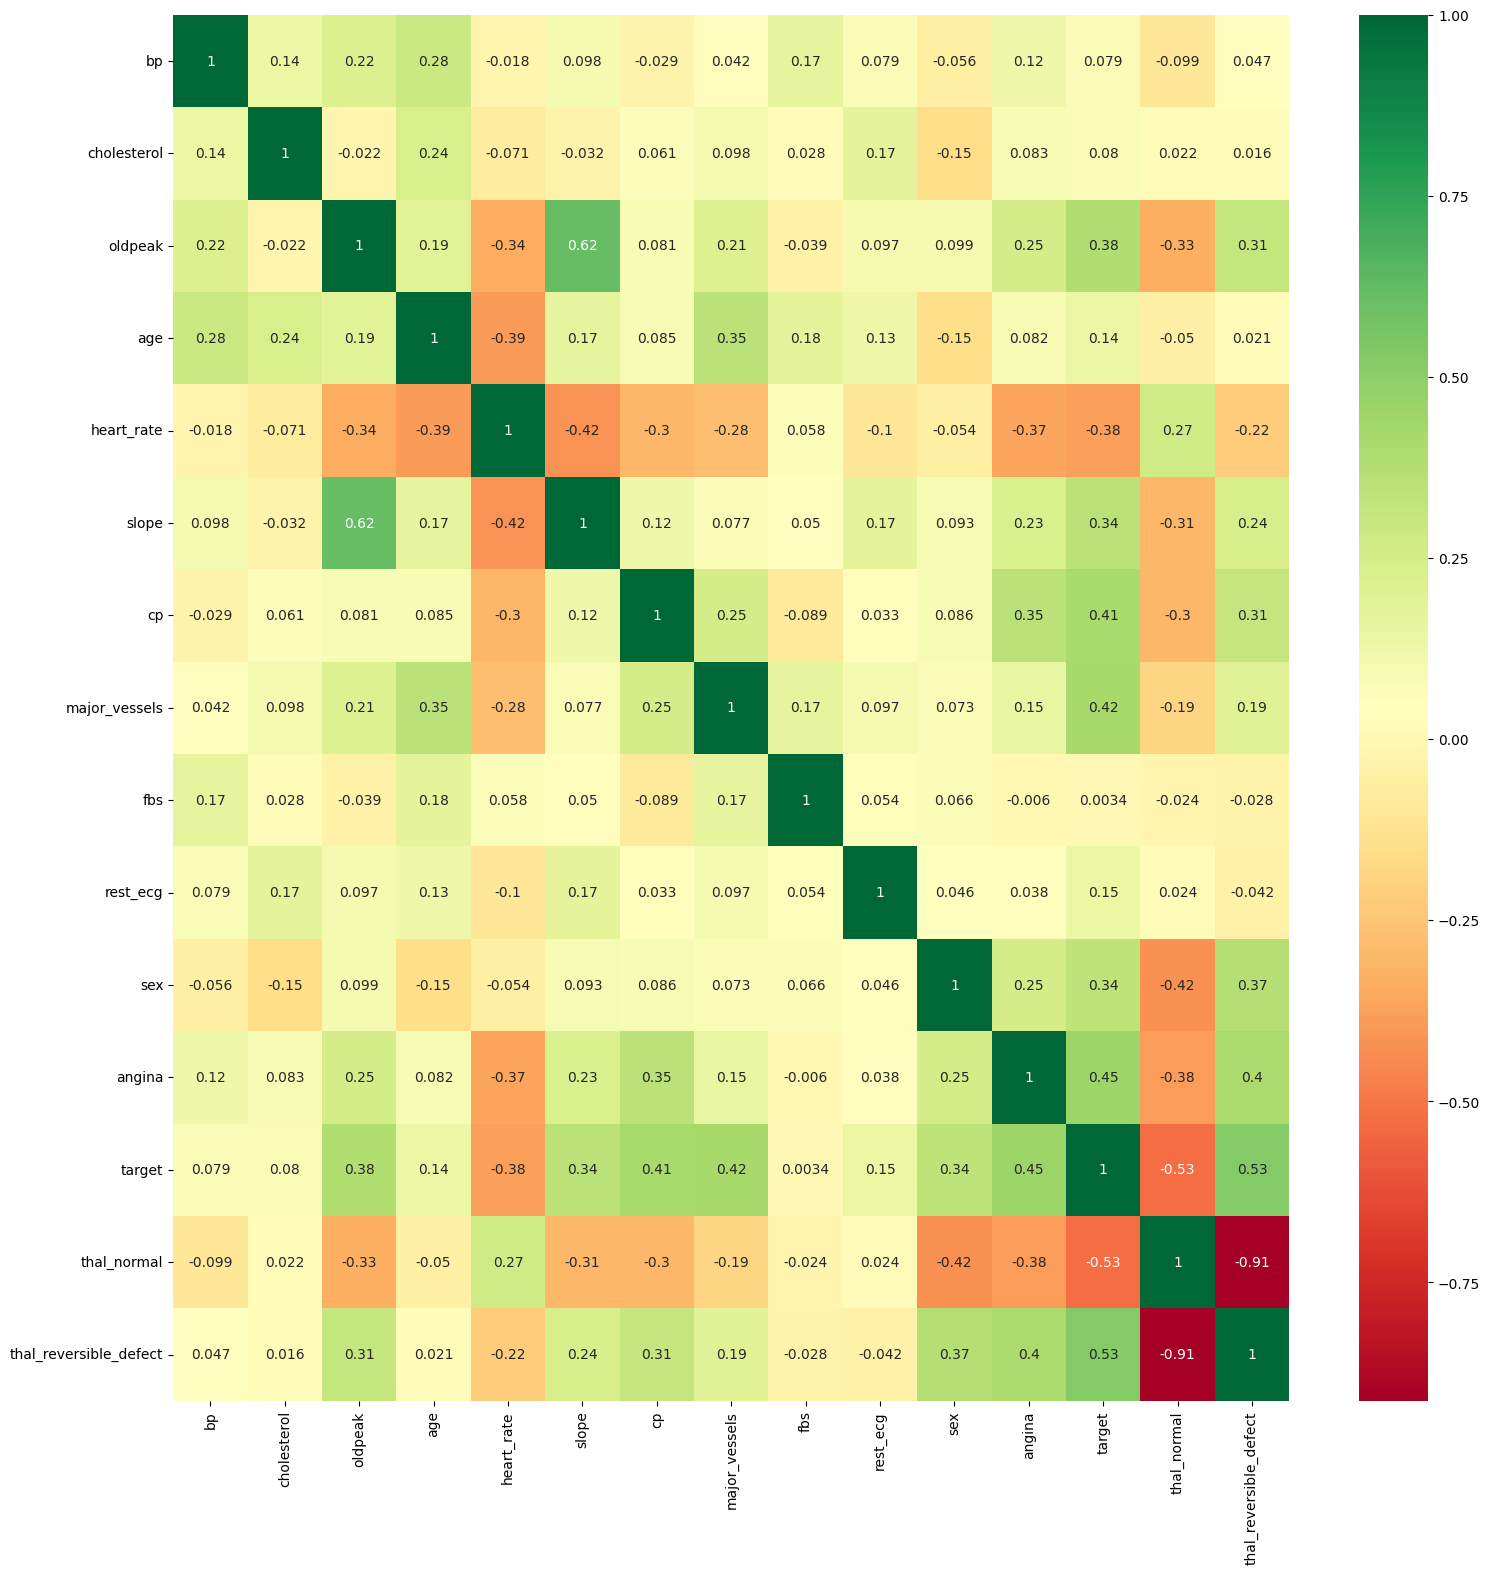

In [100]:
plt.figure(figsize=(18,18))
sns.heatmap(scaled_data.corr(),annot=True,cmap="RdYlGn")


### **splitting data into x and y**


In [34]:
x=scaled_data.drop('target',axis=1)
y=scaled_data.target

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [36]:
x_train.shape

(144, 14)

In [37]:
x_test.shape

(36, 14)

In [38]:
y_train.shape

(144,)

In [39]:
y_test.shape

(36,)

# **Model Fitting**


In [40]:
from sklearn.metrics import accuracy_score

### **Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)

In [42]:
score_lr=round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is:"+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is:86.11 %


## **Naive Bayes**


In [43]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()

nb.fit(x_train,y_train)

y_pred_nb=nb.predict(x_test)

In [44]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.56 %


## **SVM**


In [45]:
from sklearn import svm

svm= svm.SVC(kernel='linear')

svm.fit(x_train, y_train)

y_pred_svm =svm.predict(x_test)


In [46]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.33 %


## **K Nearest Neighbors**


In [47]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

In [48]:
error

[0.25,
 0.2222222222222222,
 0.1388888888888889,
 0.19444444444444445,
 0.2222222222222222,
 0.19444444444444445,
 0.19444444444444445,
 0.2222222222222222,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.1388888888888889,
 0.1388888888888889,
 0.16666666666666666,
 0.16666666666666666,
 0.19444444444444445,
 0.16666666666666666,
 0.19444444444444445,
 0.19444444444444445]

Minimum error:- 0.1388888888888889 at K = 3


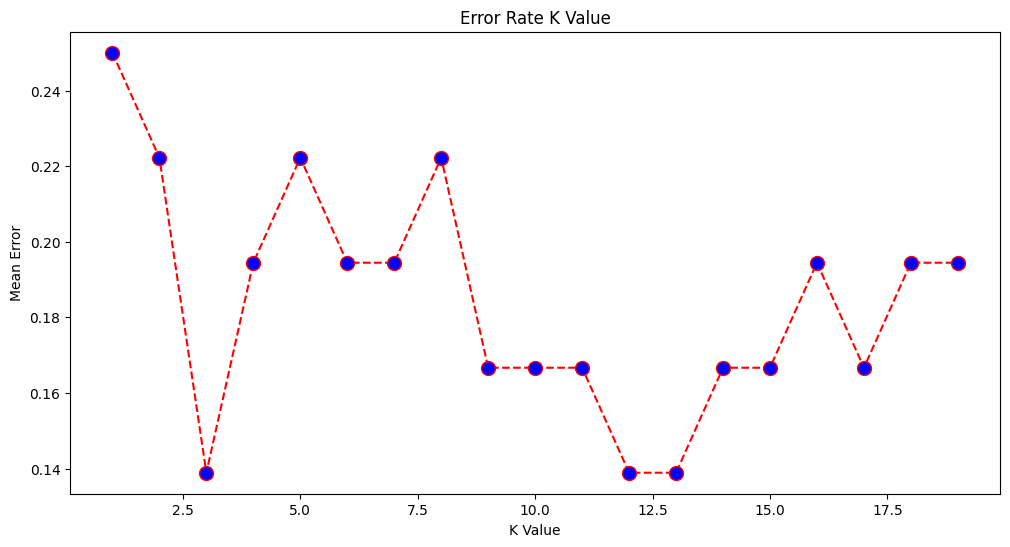

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [51]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 86.11 %


## **Decision Tree**


In [52]:
# Since we are using Decision Tree and Decision Tree is robust to outliers and doesnot require scaling.
# Only conversion of categorical data and missing values should be handled.
X=data.drop('target',axis=1)
Y=data.target

#split data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=45)

In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [54]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 91.67 %


## **Random Forest**


In [55]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [56]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 86.11 %


## **GradientBoostingClassifier**


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train) 
y_gbm=gbm.predict(x_test)

In [58]:
score_gbm = round(accuracy_score(y_gbm,y_test)*100,2)

print("The accuracy score achieved using GradientBoosting is: "+str(score_gbm)+" %")

The accuracy score achieved using GradientBoosting is: 80.56 %


#### **Hyper parameter tuning in GradientBoosting**


In [59]:
from sklearn.model_selection import RandomizedSearchCV

params= {'criterion':('friedman_mse', 'squared_error', 'mse', 'mae'),
         'n_estimators': [int(x) for x in np.linspace(start=10,stop=80,num=10)],
         'max_features': ['auto','sqrt'],
         'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
         'min_samples_split': [2,5,10,15,100],
         'min_samples_leaf': [1,2,5,10]}


rcv= RandomizedSearchCV(estimator=gbm, scoring='f1',param_distributions=params, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)

rcv.fit(x_train, y_train)
rcv_best_params=rcv.best_params_
print(f"Best paramters: {rcv_best_params})")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'n_estimators': 80, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'friedman_mse'})


In [60]:
gb=GradientBoostingClassifier(n_estimators=80,min_samples_split=100,min_samples_leaf=1,max_features='sqrt',max_depth=30,criterion="friedman_mse",subsample=0.9,
                              learning_rate=0.01,random_state=2)
gb.fit(x_train,y_train) 
y_gb=gb.predict(x_test)

In [61]:
score_gb = round(accuracy_score(y_gb,y_test)*100,2)

print("The accuracy score achieved using GradientBoosting after hyper parameter tuning is: "+str(score_gb)+" %")

The accuracy score achieved using GradientBoosting after hyper parameter tuning is: 83.33 %


## **XGBoost**

In [64]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_xgb =xgb.predict(x_test)

In [65]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.33 %


#### **Hyper parameter tuning in XGBoost**


In [66]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb1=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv1= RandomizedSearchCV(estimator=xgb1, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                
rcv1.fit(x_train, y_train)
rcv1_best_params = rcv1.best_params_
print(f"Best paramters: {rcv1_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.1, 'reg_alpha': 0.8, 'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.7, 'gamma': 0.8})


In [67]:
xgb2=XGBClassifier(reg_lambda=0.1, reg_alpha= 0.8, n_estimators=80, max_depth=5, learning_rate=0.7, gamma=0.8)
xgb2.fit(x_train, y_train)
y_pred_xgb2=xgb2.predict(x_test)


In [68]:
score_xgb2 = round(accuracy_score(y_pred_xgb2,y_test)*100,2)

print("The accuracy score achieved using XGBoost after hyper parameter tuning is: "+str(score_xgb2)+" %")

The accuracy score achieved using XGBoost after hyper parameter tuning is: 83.33 %


## **Neural Network**


In [69]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=14))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
model.fit(x_train,y_train,epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 9ms/step - loss: 0.9322 - accuracy: 0.4028
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 0.9037 - accuracy: 0.4028
Epoch 3/300
5/5 [==============================] - 0s 5ms/step - loss: 0.8762 - accuracy: 0.3889
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 0.8532 - accuracy: 0.3819
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 0.8315 - accuracy: 0.3889
Epoch 6/300
5/5 [==============================] - 0s 5ms/step - loss: 0.8133 - accuracy: 0.4097
Epoch 7/300
5/5 [==============================] - 0s 4ms/step - loss: 0.7956 - accuracy: 0.4167
Epoch 8/300
5/5 [==============================] - 0s 6ms/step - loss: 0.7801 - accuracy: 0.4028
Epoch 9/300
5/5 [==============================] - 0s 5ms/step - loss: 0.7658 - accuracy: 0.4306
Epoch 10/300
5/5 [==============================] - 0s 6ms/step - loss: 0.7521 - accuracy: 0.4375
Epoch 11/300
5/5 [===========

In [72]:
y_pred_nn = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [73]:
rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn = rounded

In [74]:
score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 83.33 %


# **Conclusion**


In [75]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_gb,score_xgb2,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","GradientBoost","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.11 %
The accuracy score achieved using Naive Bayes is: 80.56 %
The accuracy score achieved using Support Vector Machine is: 83.33 %
The accuracy score achieved using K-Nearest Neighbors is: 86.11 %
The accuracy score achieved using Decision Tree is: 91.67 %
The accuracy score achieved using Random Forest is: 86.11 %
The accuracy score achieved using GradientBoost is: 83.33 %
The accuracy score achieved using XGBoost is: 83.33 %
The accuracy score achieved using Neural Network is: 83.33 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

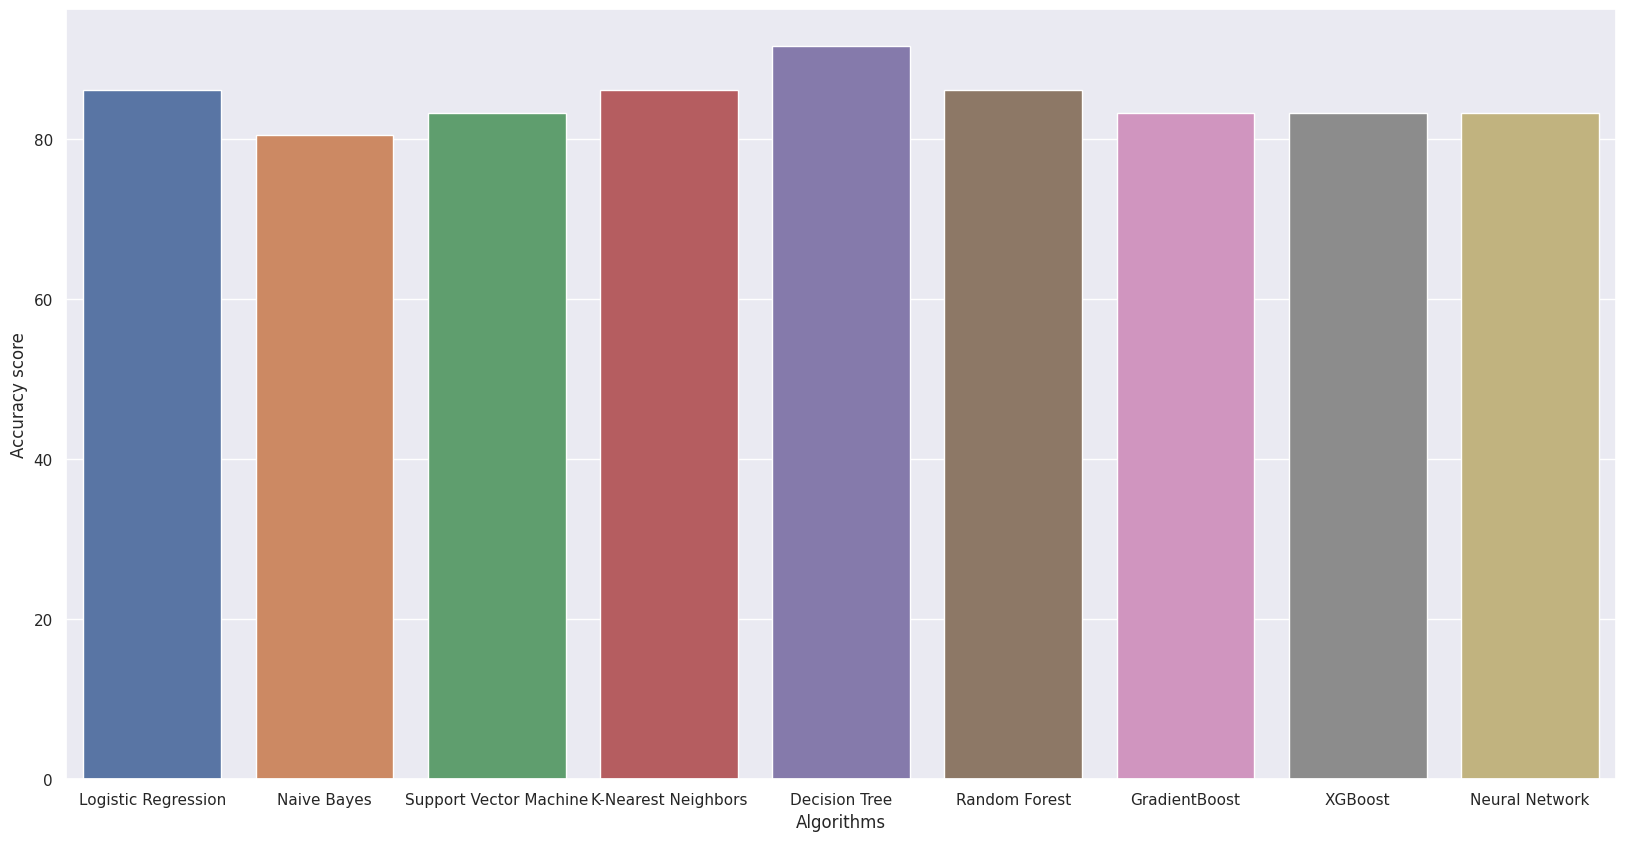

In [77]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)